In [ ]:
# Importando bibliotecas

import random

# Pseudocódigo

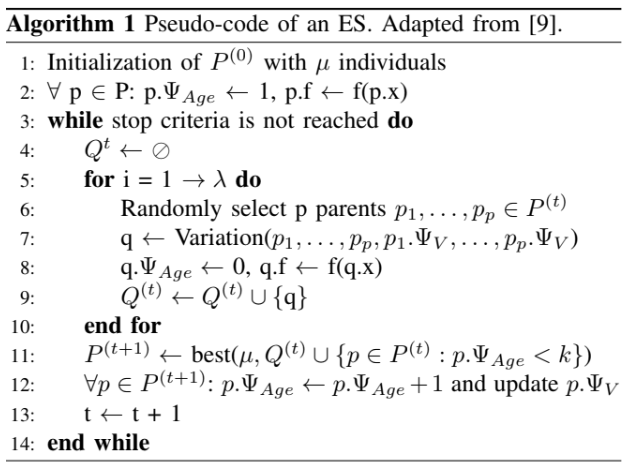

In [ ]:
# Define um indivíduo da população

class Individual:
    def __init__(self, x, psi_v, age=0):
        self.x = x # Vetor de decisão
        self.psi_v = psi_v # valor do parâmetro de variação
        self.age = age # idade do indivíduo
        self.f = self.evaluate() # valor da função objetivo

    def evaluate(self):
        # Função de avaliação f(x), precisa ser definida de acordo com o problema específico
        return sum(self.x)  # Exemplo simples, soma dos elementos do vetor x

In [ ]:
# Inicializa a população com μ indivíduos aleatórios, cada um com um vetor x de dimensão especificada e um valor inicial de psi_v

def initialize_population(mu, dimension):
    population = []
    for _ in range(mu):
        x = [random.random() for _ in range(dimension)]
        psi_v = random.random()  # Valor inicial de psi_v
        individual = Individual(x, psi_v)
        individual.age = 1
        population.append(individual)
    return population

In [ ]:
# Aplica uma variação aos pais selecionados para gerar um novo indivíduo

def variation(parents, psi_vs):
    # Variar (mutação/recombinação) os pais para criar um novo indivíduo
    # Este é um exemplo simples, deve ser adaptado de acordo com a necessidade
    child_x = [(p.x[i] + random.uniform(-v, v)) for i, (p, v) in enumerate(zip(parents, psi_vs))]
    child_psi_v = sum(psi_vs) / len(psi_vs)  # Média de psi_vs dos pais
    return Individual(child_x, child_psi_v)

In [ ]:
# Seleciona os melhores μ indivíduos da população

def best(mu, population):
    # Selecionar os melhores μ indivíduos
    return sorted(population, key=lambda ind: ind.f, reverse=True)[:mu]

In [ ]:
# Implementa o loop principal do algoritmo ES

def evolution_strategy(mu, lambda_, dimension, max_generations, k):
    P = initialize_population(mu, dimension)

    t = 0
    while t < max_generations:
        Q = []
        for _ in range(lambda_):
            parents = random.sample(P, k)
            psi_vs = [p.psi_v for p in parents]
            q = variation(parents, psi_vs)
            q.age = 0
            q.f = q.evaluate()
            Q.append(q)

        P = best(mu, Q + [p for p in P if p.age < k])

        for p in P:
            p.age += 1
            # Atualização de psi_v (exemplo simples)
            p.psi_v = p.psi_v * random.uniform(0.9, 1.1)

        t += 1

    return P

In [ ]:
# Parâmetros do algoritmo
mu = 10  # Tamanho da população
lambda_ = 20  # Número de descendentes
dimension = 5  # Dimensão do problema
max_generations = 100  # Número máximo de gerações
k = 5  # Idade máxima para sobrevivência

# Executando o algoritmo ES
final_population = evolution_strategy(mu, lambda_, dimension, max_generations, k)

# Mostrando os resultados
for ind in final_population:
    print(f'x: {ind.x}, f(x): {ind.f}, age: {ind.age}, psi_v: {ind.psi_v}')